In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Times Pregnant', 'Plasma Concentration', 'Blood Pressure', 'Triceps Skin Fold', 'Insulin Test', 'BMI', 'Pedigree', 'Age', 'Result']
df = pd.read_csv(url, names=names)
df.isnp().sum()

Times Pregnant          0
Plasma Concentration    0
Blood Pressure          0
Triceps Skin Fold       0
Insulin Test            0
BMI                     0
Pedigree                0
Age                     0
Result                  0
dtype: int64

    INFO: Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  
  
  `VARIABLES`:
  
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Result variable (0 or 1)

!!!!!!!!!!! All `0` represent a missing value. !!!!!!!!!!! (excelt for the `Class` column)

# Pandas

Load the df, clean column names, clean all column values.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Times Pregnant', 'Plasma Concentration', 'Blood Pressure', 'Triceps Skin Fold', 'Insulin Test', 'BMI', 'Pedigree', 'Age', 'Result']
class DiabetestDataset():
     
    def __init__(self,url):

        self.load_df(url)
        #self.clean_columns()

    #def load_df(self, url):
        self.df= pd.read_csv(url,names=names)
    
    #def nan_in_dataframe(self):    
        #return self.df.isna().sum()
        return self.df

    #def clean_columns(self):
        self.df.columns = self.df.columns.str.lower()
        self.df.columns = self.df.columns.str.replace(" ","_")
        self.df["times_pregnant"] = self.df["times_pregnant"].astype(int)
        self.df["plasma_concentration"] = self.df["plasma_concentration"].astype(int)
        self.df = self.df.replace(0, np.nan)
        self.df["result"] = self.df["result"].replace(np.nan,0)
        self.df = self.df.dropna(how="any")

    def countplot_result(self):
        plt.figure(figsize=(20, 8))
        ax= sns.countplot(data=self.df,
                          x="result")
    def countplot_times_pregnant(self):
        plt.figure(figsize=(20, 8))
        ax= sns.countplot(data=self.df,
                          x="times_pregnant")
    def histplot_rating(self):
        plt.figure(figsize=(20, 8))
        ax= sns.histplot(data=self.df,
                  x="age",
                  bins = 30)                       
        plt.xlim(20,79)

    def factorplot_pregnancies(self):
        plt.figure(figsize=(25, 10))
        ax= sns.factorplot(data=self.df,
                  x="times_pregnant",
                  y= "insulin_test",
                  hue = "result")                       
    def pairplot_df(self):
        plt.figure(figsize=(25, 10))
        ax= sns.pairplot(data=self.df,
                  hue="result")
    def boxplot_df(self):
        plt.figure(figsize=(25, 10))
        ax= sns.boxplot(data=self.df,
                  x="times_pregnant",
                  y="age",
                  hue="result")
                           



test = DiabetestDataset(url)

#test.nan_in_dataframe()
#test.countplot_result()
#test.countplot_times_pregnant()
#test.histplot_rating()
#test.factorplot_pregnancies()
#test.pairplot_df()
#test.boxplot_df()

In [ ]:
test.df.isnull().sum()

times_pregnant          0
plasma_concentration    0
blood_pressure          0
triceps_skin_fold       0
insulin_test            0
bmi                     0
pedigree                0
age                     0
result                  0
dtype: int64

# Graphs

For every single grpah, try to think of what isngiht you can get.

`sns.countplot()` where x is `result`

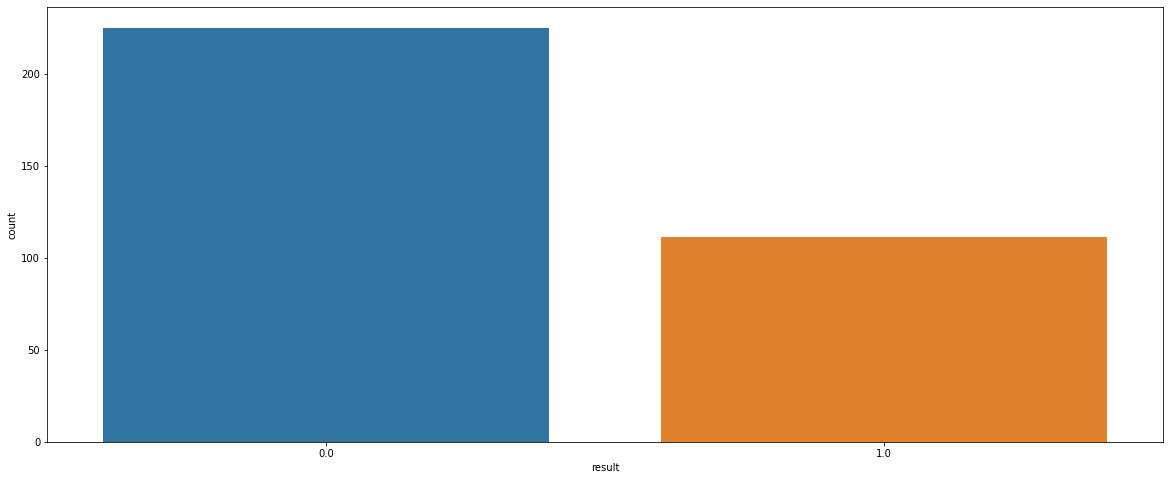

In [ ]:
test.countplot_result()

`sns.countplot()` where x is `pregnancies`

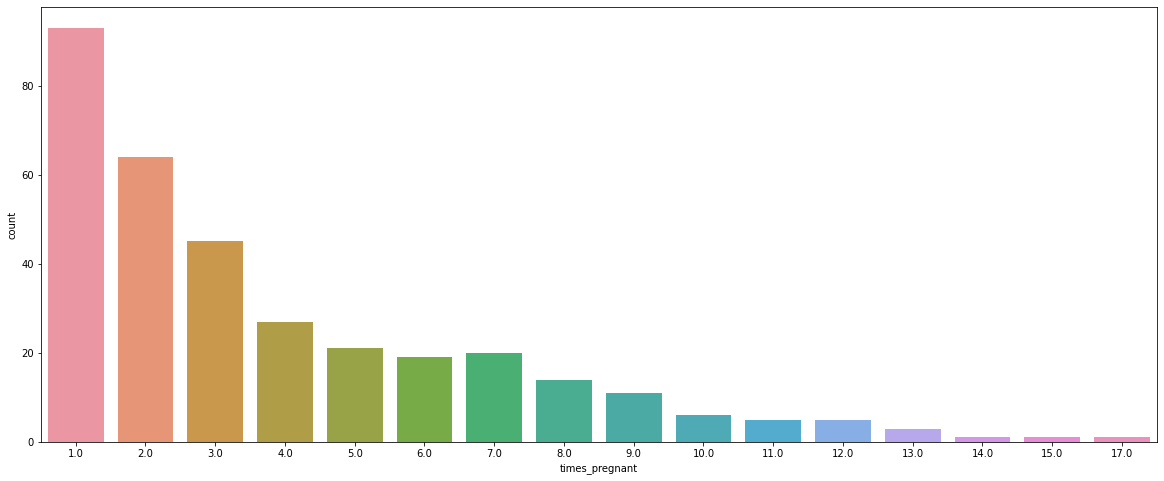

In [ ]:
test.countplot_times_pregnant()

`sns.histplot()` where x is `age`


`sns.heatmap(data= _correlation)` with `annot = True` argument, so you can see the values, and `_correlation = df.corr()`

<AxesSubplot:>

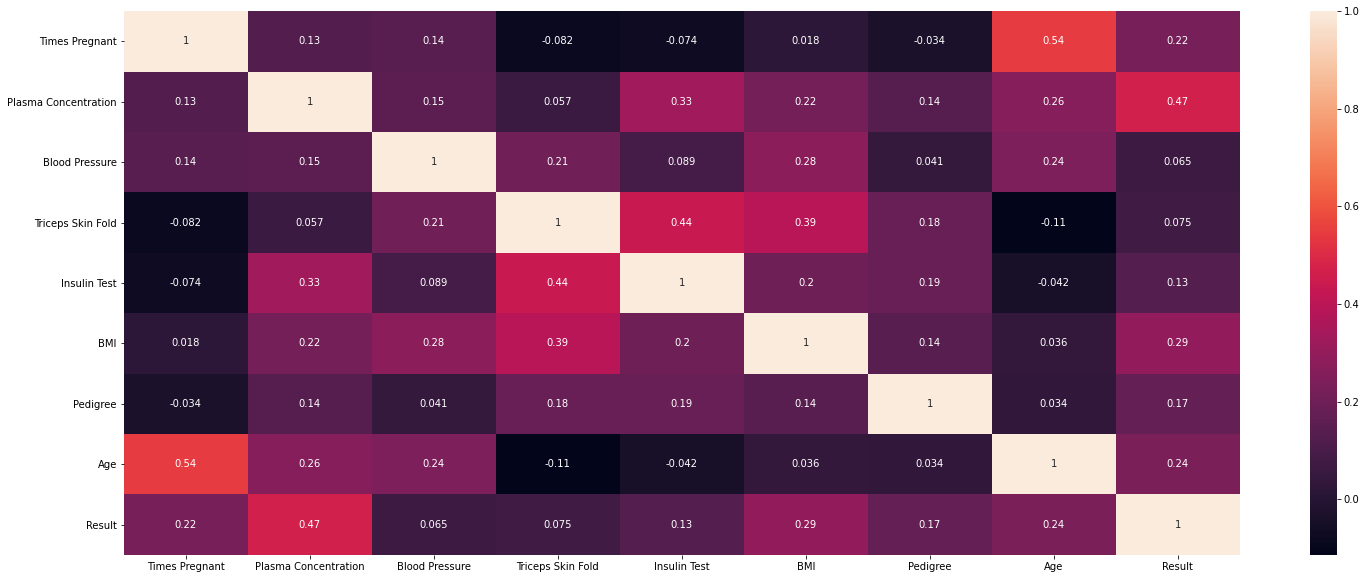

In [ ]:
plt.figure(figsize=(25, 10))
_correlation = df.corr()
sns.heatmap(data= _correlation, annot = True)

`sns.factorplot()` where x will be `pregnancies` and y `insulin`, colour it by `result` so that we can see the data for both 0 and 1 results

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1800x720 with 0 Axes>

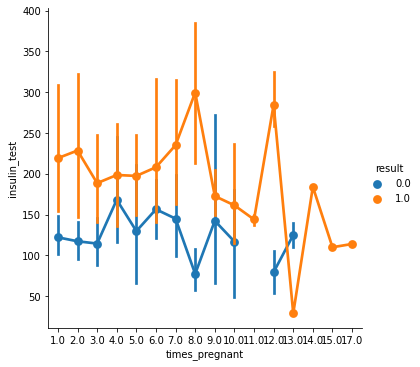

In [ ]:
test.factorplot_pregnancies()


`sns.pairplot(data=df)` , colour it by `result` (hue)

<Figure size 1800x720 with 0 Axes>

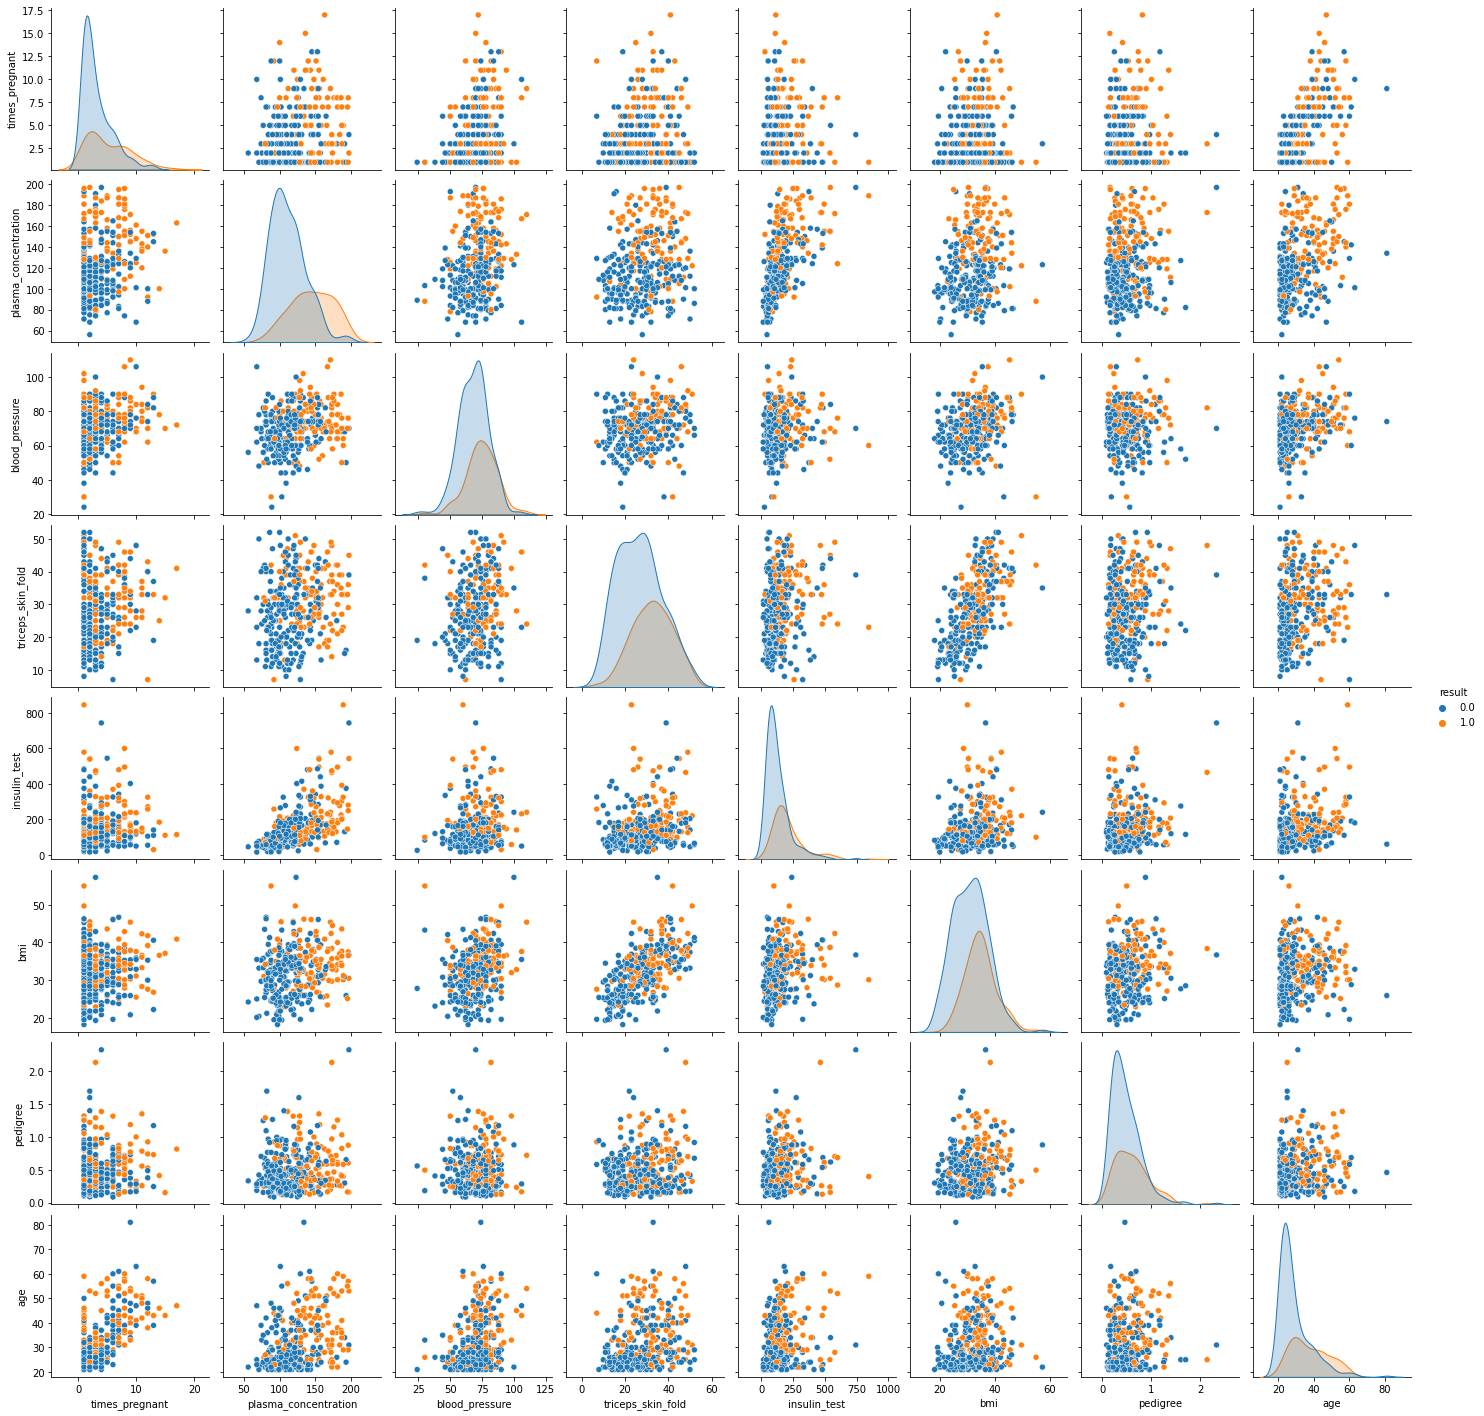

In [ ]:
test.pairplot_df()

`sns.boxplot()` where x is `pregnancies`, y is `age`, colour it by `result`

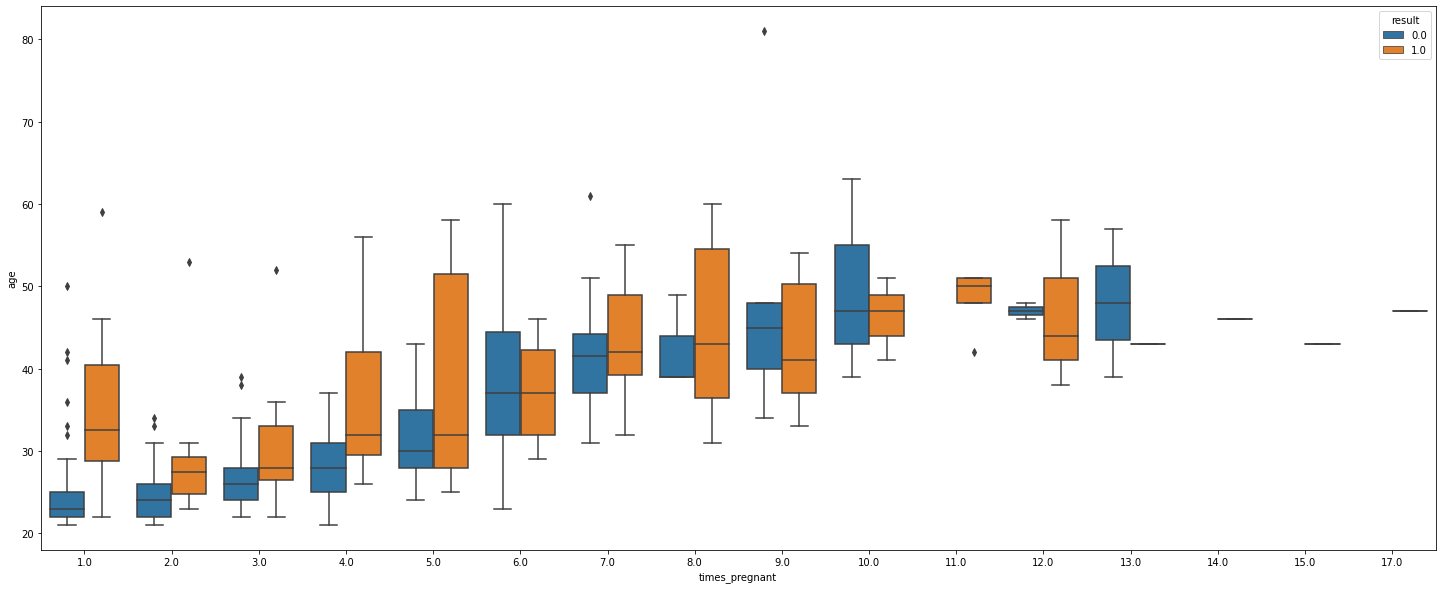

In [ ]:
test.boxplot_df()

Can you think of any other graphs/combinations that you can think of to get some insight?  Don't be afraid to try it out. I did not list all possible combinations, graphs..

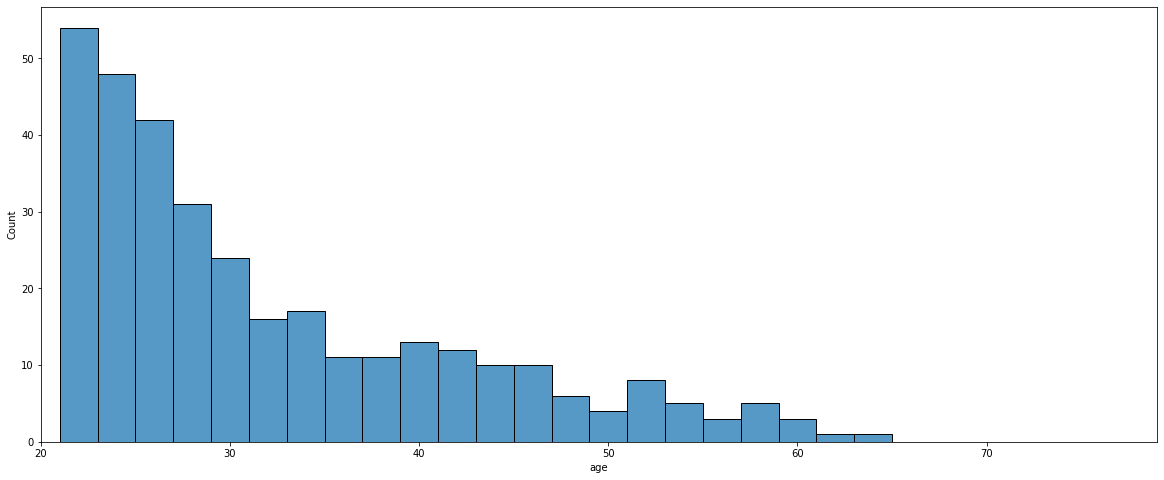

In [ ]:
test.histplot_rating()

<AxesSubplot:xlabel='bmi', ylabel='Count'>

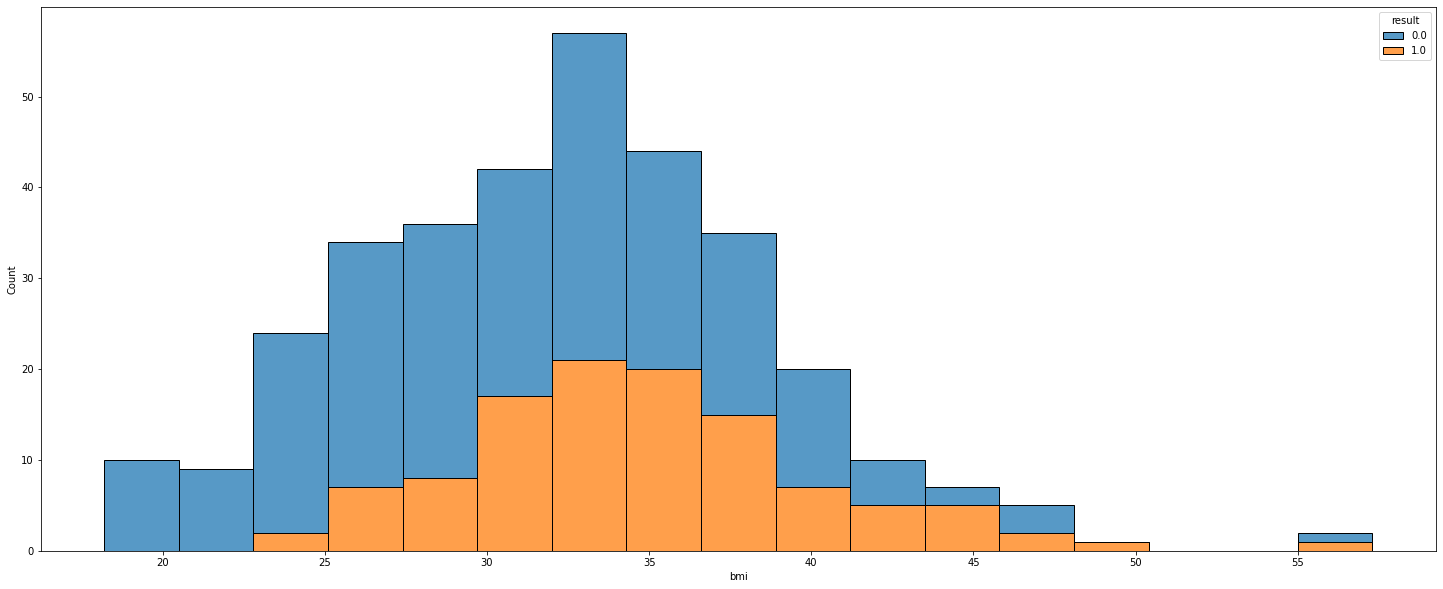

In [ ]:
plt.figure(figsize=(25, 10))
sns.histplot(data=test.df,
             x="bmi",
             hue="result",
             multiple="stack")

<AxesSubplot:xlabel='plasma_concentration', ylabel='Count'>

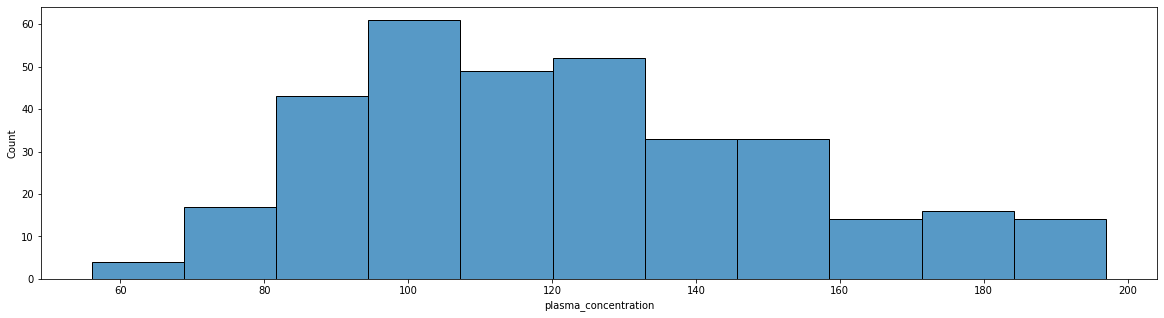

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.histplot(data=test.df["plasma_concentration"],)

In [ ]:
def plasma_concentration_category(row):
    if row["plasma_concentration"] < 80:
        row["plasma_concentration_category"] = "less than 80"
    elif 80 < row["plasma_concentration"] < 110:
        row["plasma_concentration_category"] = "80 to 110"
    elif 110 < row["plasma_concentration"] < 140:
        row["plasma_concentration_category"] = "110 to 140"
    else:
        row["plasma_concentration_category"] = "more than 140"   
    return row
test.df = test.df.apply(plasma_concentration_category, axis=1)
test.df

,times_pregnant,plasma_concentration,blood_pressure,triceps_skin_fold,insulin_test,bmi,pedigree,age,result,plasma_concentration_category
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,80 to 110
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0,less than 80
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0,more than 140
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1.0,more than 140
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,1.0,more than 140
...,...,...,...,...,...,...,...,...,...,...
751,1.0,121.0,78.0,39.0,74.0,39.0,0.261,28.0,0.0,110 to 140
755,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37.0,1.0,110 to 140
760,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22.0,0.0,80 to 110
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,80 to 110


<Figure size 1800x720 with 0 Axes>

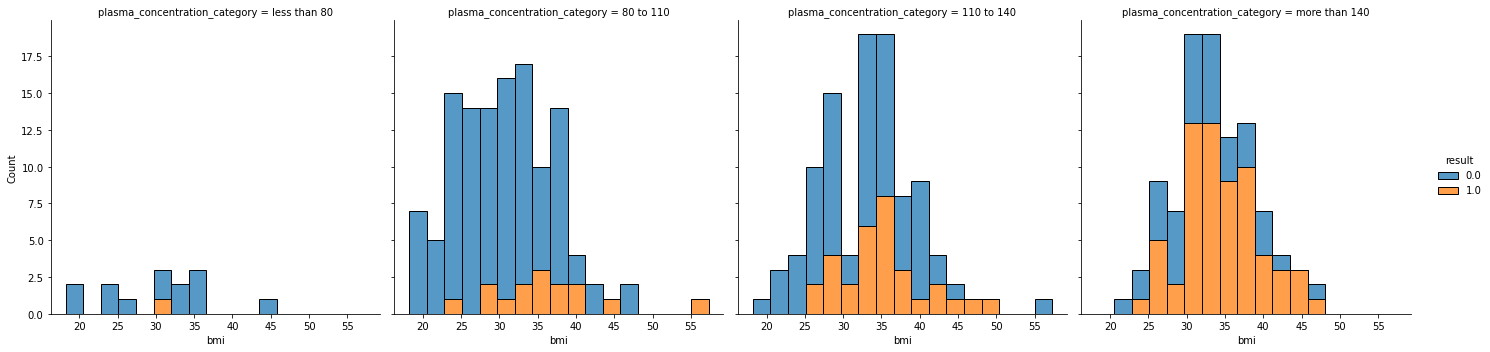

In [ ]:
plt.figure(figsize=(25, 10))
sns.displot(data=test.df,
             x="bmi",
             hue="result",
             multiple="stack",
             col ="plasma_concentration_category",
             col_order = ["less than 80", "80 to 110", "110 to 140", "more than 140" ])

<AxesSubplot:xlabel='age', ylabel='Count'>

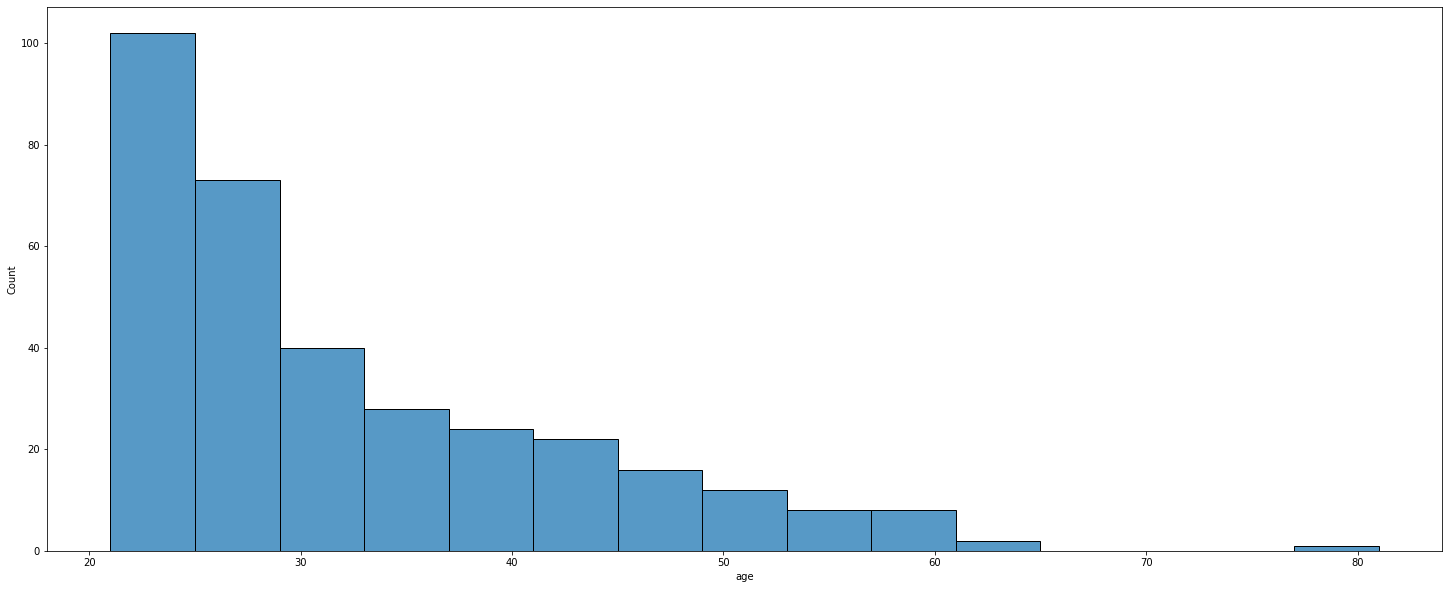

In [ ]:
plt.figure(figsize=(25, 10))
sns.histplot(data=test.df,
             x="age",)

In [ ]:
def age_category(row):
    if row["age"] < 30:
        row["age_category"] = "less than 30"
    elif 30 < row["age"] < 40:
        row["age_category"] = "30 to 40"
    elif 40 < row["age"] < 50:
        row["age_category"] = "40 to 50"
    else:
        row["age_category"] = "more than 50"   
    return row
test.df = test.df.apply(age_category, axis=1)
test.df

,times_pregnant,plasma_concentration,blood_pressure,triceps_skin_fold,insulin_test,bmi,pedigree,age,result,plasma_concentration_category,age_category
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,80 to 110,less than 30
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0,less than 80,less than 30
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0,more than 140,more than 50
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1.0,more than 140,more than 50
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,1.0,more than 140,more than 50
...,...,...,...,...,...,...,...,...,...,...,...
751,1.0,121.0,78.0,39.0,74.0,39.0,0.261,28.0,0.0,110 to 140,less than 30
755,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37.0,1.0,110 to 140,30 to 40
760,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22.0,0.0,80 to 110,less than 30
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,80 to 110,more than 50


<Figure size 1800x720 with 0 Axes>

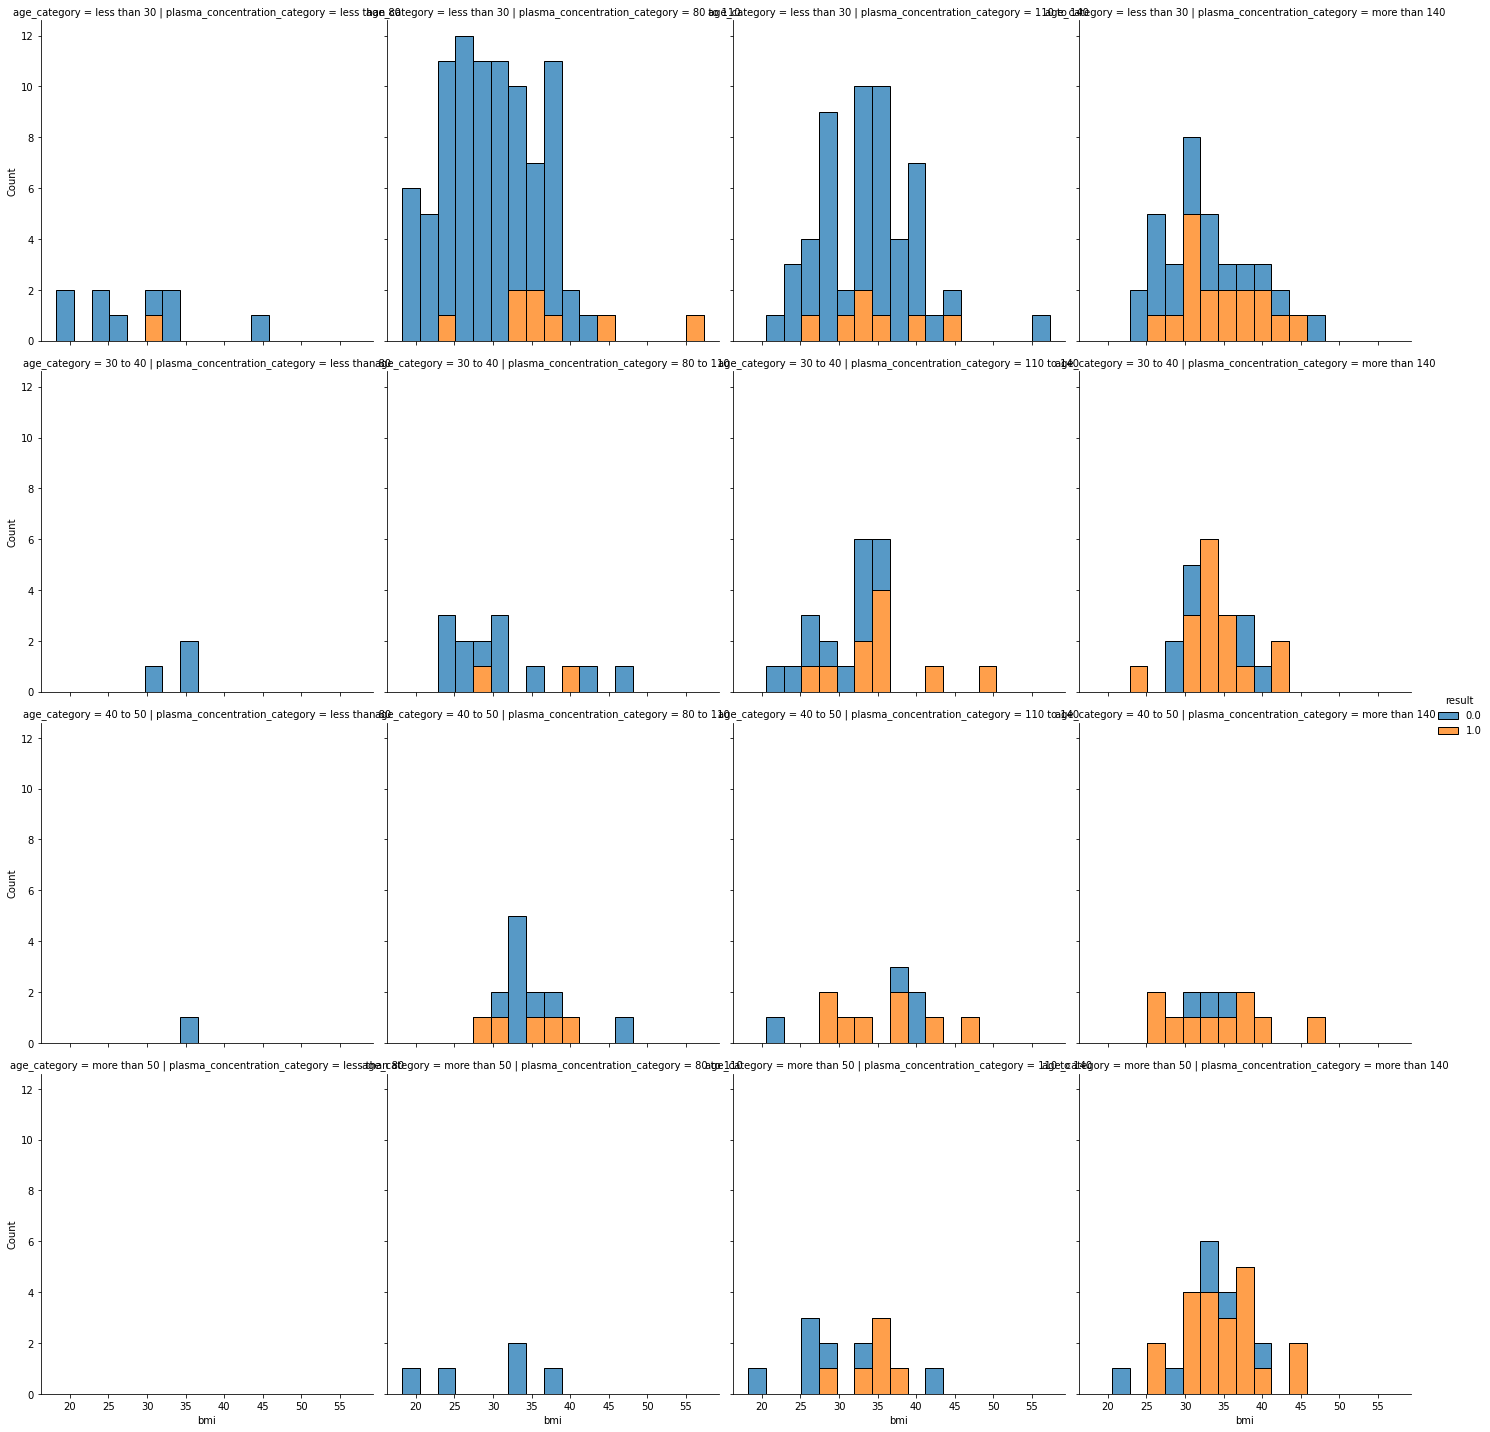

In [ ]:
plt.figure(figsize=(25, 10))
sns.displot(data=test.df,
             x="bmi",
             hue="result",
             multiple="stack",
             col ="plasma_concentration_category",
             col_order = ["less than 80", "80 to 110", "110 to 140", "more than 140" ],
             row="age_category",
             row_order= ["less than 30" , "30 to 40", "40 to 50", "more than 50"])

<AxesSubplot:xlabel='age_category', ylabel='count'>

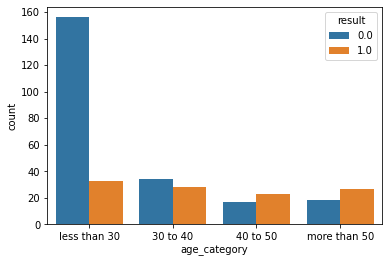

In [ ]:
sns.countplot(data= test.df,
              x="age_category",
              hue="result",
              order=["less than 30" , "30 to 40", "40 to 50", "more than 50"])

<AxesSubplot:xlabel='age', ylabel='Count'>

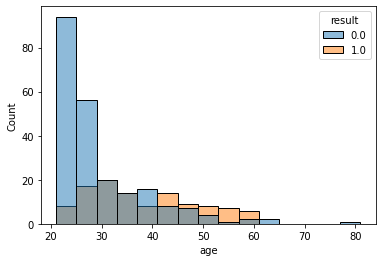

In [ ]:
sns.histplot(data= test.df,
              x="age",
              hue="result",)

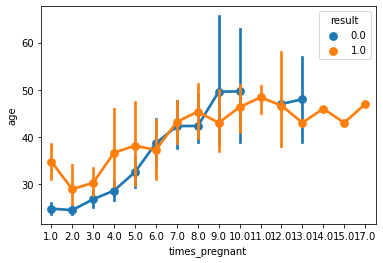

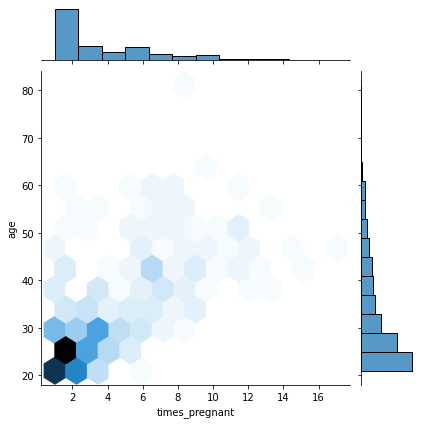

In [ ]:
sns.pointplot(data=test.df, x="times_pregnant", y="age", hue="result")
sns.jointplot(data=test.df, x="times_pregnant", y="age", kind="hex")

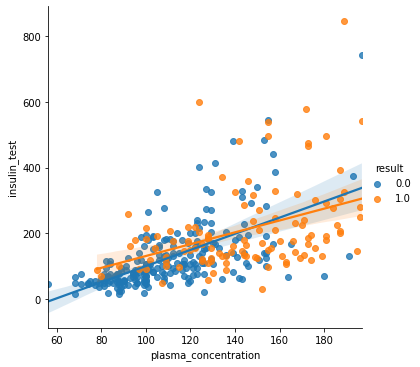

In [ ]:
sns.lmplot(data=test.df, x="plasma_concentration", y="insulin_test", hue="result")

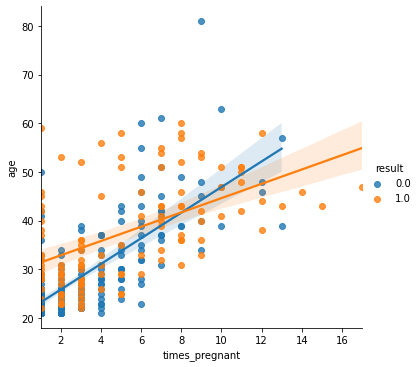

In [ ]:
sns.lmplot(data=test.df, x="times_pregnant", y="age", hue="result")

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/

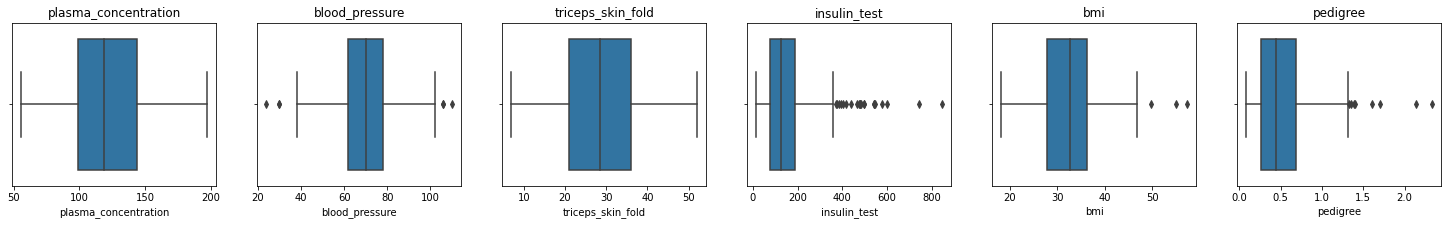

In [ ]:
plt.figure(figsize=(30,3))

for i in np.arange(1,7):
    plt.subplot(1,7,i,title=test.df.columns[i])
    sns.boxplot(test.df[test.df.columns[i]])

<AxesSubplot:xlabel='result', ylabel='bmi'>

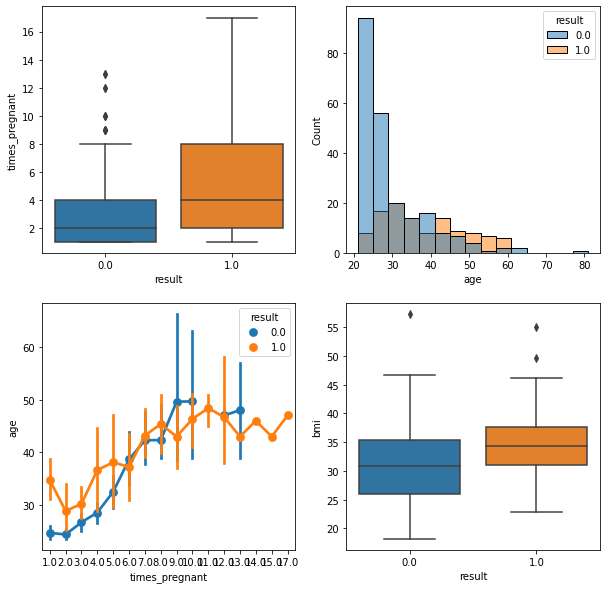

In [ ]:
fig, ax_arr  = plt.subplots(2,2, figsize=(10,10) )

sns.boxplot(data=test.df, x="result", y="times_pregnant", ax= ax_arr[0][0])
sns.histplot(data= test.df,
              x="age",
              hue="result", ax= ax_arr[0][1])
sns.pointplot(data=test.df, x="times_pregnant", y="age", hue="result", ax= ax_arr[1][0])

sns.boxplot(data=test.df, x="result", y="bmi", ax= ax_arr[1][1])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d3ce7c8-a514-49e4-9ba4-a5899ac52ea5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>